In [1]:
import numpy as np
import pandas as pd
import skimage.io as io
import os 
from skimage.filters import try_all_threshold
import matplotlib.pyplot as plt

import cv2


In [2]:
def segment(image):
    blured_image = cv2.GaussianBlur(image, (7, 7), 0)
    ycbcr_image = cv2.cvtColor(blured_image, cv2.COLOR_BGR2YCrCb)
    # Extract the Cr channel
    cr_channel = ycbcr_image[:,:,1]

    # Apply thresholding to obtain a binary image
    _, binary_img = cv2.threshold(cr_channel,0,255,cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # Define the structuring element for the closing operation
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (25, 25))

    # Perform the closing operation
    closed_img = cv2.morphologyEx(binary_img, cv2.MORPH_CLOSE, kernel)

    # Find the contours in the binary image
    contours, hierarchy = cv2.findContours(closed_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Filling the contours on a copy of the original image
    img_contours = cv2.cvtColor(cr_channel, cv2.COLOR_GRAY2BGR)
    cv2.drawContours(img_contours, contours, -1, (0, 0, 0), -1)

    return img_contours

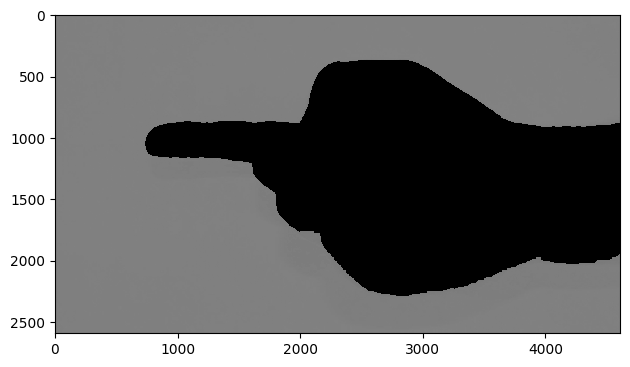

In [4]:
image = io.imread('1_men (4).JPG')
segmented = segment(image)
io.imshow(segmented)

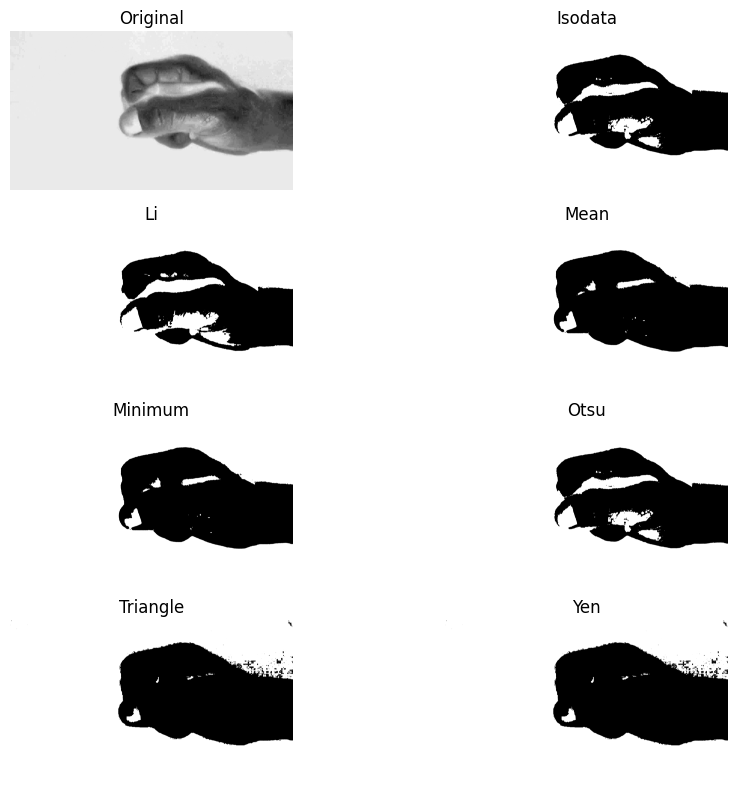

In [41]:
fig, ax = try_all_threshold(cr_channel, figsize=(10, 8), verbose=False)
plt.show()

In [12]:
from rembg import remove
from PIL import Image
input_path="w74.jpg"
output_path="out.JPG"
input=Image.open(input_path)
output=remove(input)
output.show()

In [ ]:
# ROI Frame
roi = image[top:bottom, right:left]

# converting ROI to gray and blur it
gray_image = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
gray_blur = cv2.GaussianBlur(gray_image, (7, 7), 0)

# To set the background and update our weight to reach the threshold
if background is None:
    background = gray_blur.copy().astype("float")
else:
    # compute weighted average, accumulate it and update the background
    cv2.accumulateWeighted(gray_blur, background, weight_avg)

diff = cv2.absdiff(background.astype("uint8"), gray_blur)
kernel_square = np.ones((11, 11), np.uint8)
kernel_ellipse = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))

# Perform morphological transformations in filtering out the background noise like dilasion, erosion, median
dilation = cv2.dilate(diff, kernel_ellipse, iterations=1)
erosion = cv2.erode(dilation, kernel_square, iterations=1)
filtered = cv2.medianBlur(erosion, 5)
median = filtered

# threshold the image to get the foreground
threshold_image = cv2.threshold(median, 25, 255, cv2.THRESH_BINARY)[1]
contours, hierachy = cv2.findContours(threshold_image.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

segmented = None
if len(contours) > 0:
    # maximum contour which is the hand
    segmented = max(contours, key=cv2.contourArea)

if segmented is not None:
    # Draw the contour
    cv2.drawContours(input_frame, [segmented + (right, top)], -1, (0, 0, 255))
    # show the thresholded image
    cv2.imshow("Thesholded", threshold_image)
    # draw the bounding rectangle
    cv2.rectangle(input_frame, (left, top), (right, bottom), (0, 255, 0), 2)

    print("pass it to model and get the result")

# update the frame with contour and bounding rect
cv2.imshow("Frames", input_frame)

cv2.waitKey(0)
cv2.destroyAllWindows()